In [1]:
import keras
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils




In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


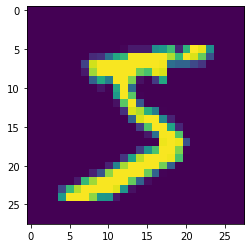

In [3]:
import matplotlib.pyplot as plt  
plt.imshow(x_train[0])


In [4]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')
x_test = x_test.reshape(10000,28,28,1).astype('float32')


In [5]:
number_of_classes = 10

y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
#build model
model = Sequential()
model.add( Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Flatten())
model.add( Dense(number_of_classes,activation="softmax"))

In [7]:
#compile model
# model.compile(
#               loss = tensorflow.keras.losses.sparse_categorical_crossentropy(from_logits=True),
#               optimizer="adam",
#               metrics=['accuracy'])
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [8]:
#fixing the model
model.fit(x_train,
          y_train,
          validation_data = (x_test,y_test),
          epochs=5,
          batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 19s 4ms/step - loss: 0.2157 - accuracy: 0.9511 - val_loss: 0.0890 - val_accuracy: 0.9741
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.0856 - val_accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0507 - accuracy: 0.9836 - val_loss: 0.0913 - val_accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.1089 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.1137 - val_accuracy: 0.9754


In [9]:
metrix = model.evaluate(x_test,y_test,verbose=0)
print("Test loss and accuracy")
print(metrix)


Test loss and accuracy
[0.11372578144073486, 0.9753999710083008]


In [10]:
predection = model.predict(
    x_test[:4]
)
print(predection)

[[4.1243221e-13 3.1413815e-19 1.6396887e-12 9.9113426e-12 9.8040982e-19
  5.4714088e-21 2.1568718e-20 1.0000000e+00 6.1066840e-14 1.2872349e-12]
 [8.4636338e-07 9.1820673e-10 9.9999905e-01 1.8928184e-10 2.7399444e-11
  9.8281245e-20 1.0600829e-07 1.0727963e-17 2.8653654e-10 9.1462724e-17]
 [1.5640342e-08 9.9914706e-01 4.3486602e-06 8.0019559e-12 8.4648206e-04
  2.6889209e-09 2.0282604e-09 2.8191571e-10 1.9757842e-06 1.6019640e-12]
 [1.0000000e+00 4.1220824e-16 1.6044244e-11 4.4781199e-14 3.9946253e-13
  1.0083121e-15 3.0570777e-09 1.0398677e-14 1.1238994e-11 1.2726721e-09]]


In [11]:
import numpy as np
print( np.argmax(predection,axis=1))

[7 2 1 0]


In [12]:
model.save('models/mnistCNN.h5')